In [ ]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import nltk
nltk.download('stopwords')
import numpy as np
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle
nltk.download('wordnet')

from nltk.tokenize import sent_tokenize
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [53]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
df=pd.read_csv(r'/content/drive/My Drive/Project2.csv')

# **Pre-Processing Data**

In [ ]:
df.head()

,date,company,text
0,10/10/20 2:13,Apple,"#Apple I won the prize, and while completing t..."
1,9/25/20 13:34,Apple,Correction over shorts!!! #NASDAQ #nyse #tesla...
2,10/10/20 5:14,Apple,I think it’s time that #Apple releases an army...
3,10/11/20 17:23,Apple,@YourAnonCentral @Apple @telegram Oh good just...
4,9/25/20 12:34,Apple,Twitter security: physical security keys for s...


In [ ]:
df.describe

<bound method NDFrame.describe of                  date  ...                                               text
0       10/10/20 2:13  ...  #Apple I won the prize, and while completing t...
1       9/25/20 13:34  ...  Correction over shorts!!! #NASDAQ #nyse #tesla...
2       10/10/20 5:14  ...  I think it’s time that #Apple releases an army...
3      10/11/20 17:23  ...  @YourAnonCentral @Apple @telegram Oh good just...
4       9/25/20 12:34  ...  Twitter security: physical security keys for s...
...               ...  ...                                                ...
48571    9/22/20 1:00  ...  @elonmusk won't be very happy after watching t...
48572   9/26/20 19:39  ...  @elonmusk how someone without job ( like me) t...
48573   10/2/20 20:28  ...  There is a live without #Amazon and without #T...
48574    9/20/20 7:17  ...  American Lung Association: Switch To EVs By 20...
48575   10/6/20 21:39  ...  Soon to be seen in #Israel and all of Shiloh's...

[48576 rows x 3 columns]>

In [ ]:
df["new_date"] = pd.to_datetime(df.date)
df= df.drop('date',axis=1)
df.set_index('new_date',inplace=True)
df.head()

,company,text
new_date,,
2020-10-10 02:13:00,Apple,"#Apple I won the prize, and while completing t..."
2020-09-25 13:34:00,Apple,Correction over shorts!!! #NASDAQ #nyse #tesla...
2020-10-10 05:14:00,Apple,I think it’s time that #Apple releases an army...
2020-10-11 17:23:00,Apple,@YourAnonCentral @Apple @telegram Oh good just...
2020-09-25 12:34:00,Apple,Twitter security: physical security keys for s...


In [ ]:
def clean_text(text):
  tokens = text.lower().split() #selects tokens as text
  tokens = [re.sub('[^A-Za-z]','',el) for el in tokens]  #takes out numbers and punctutations
  tokens = [re.sub('https[a-z]*',' ', el) for el in tokens] # takes out the url tags
  return ' '.join(tokens)

In [ ]:
df['cleaned_text'] = df.text.apply(clean_text)
df.cleaned_text.head()

new_date
2020-10-10 02:13:00    apple i won the prize and while completing the...
2020-09-25 13:34:00    correction over shorts nasdaq nyse tesla apple...
2020-10-10 05:14:00    i think its time that apple releases an army b...
2020-10-11 17:23:00    youranoncentral apple telegram oh good just we...
2020-09-25 12:34:00    twitter security physical security keys for st...
Name: cleaned_text, dtype: object

In [ ]:
df['cleaned_text'].iloc[0] # -- now no longer shows remnants of url tags

'apple i won the prize and while completing the data a malfunction occurred in the browser and took me off the page as shown in the pictures please hand me the prize if it is correct  '

# Topic Modeling

**Question 4**

In [ ]:
def get_wordnet_pos(tag):
    # Return whether "tag" is adjective, 
    # noun, verb or adverb
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
sw = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def cleaner1_text(text):
  tokens= text.split()
  tokens = [el for el in tokens if el not in sw] #takes out stopwords
  tokens_pos = nltk.pos_tag(tokens) #giving string index out of range error
  tokens = [lemmatizer.lemmatize(el[0],get_wordnet_pos(el[1])) for  el in tokens_pos]
  return ' '.join(tokens).split()

In [ ]:
df['cleaner1_text'] = df.cleaned_text.apply(cleaner1_text)
df['cleaner1_text'].iloc[10]

['io',
 'get',
 'rid',
 'true',
 'tone',
 'cause',
 'phone',
 'look',
 'like',
 'got',
 'feature',
 'snow',
 'white',
 'appleevent',
 'apple',
 'applesupport']

In [ ]:
print(df['text'].iloc[0]) # problem with url tag old -solved

#Apple I won the prize, and while completing the data, a malfunction occurred in the browser and took me off the page as shown in the pictures. Please hand me the prize if it is correct. https://t.co/8nUvJP2fix


In [ ]:
print(df['cleaner1_text'].iloc[0])  #problem with url tag old -solved

['apple', 'prize', 'complete', 'data', 'malfunction', 'occur', 'browser', 'take', 'page', 'show', 'picture', 'please', 'hand', 'prize', 'correct']


In [ ]:
df['cleaner1_text'].iloc[0]

['apple',
 'prize',
 'complete',
 'data',
 'malfunction',
 'occur',
 'browser',
 'take',
 'page',
 'show',
 'picture',
 'please',
 'hand',
 'prize',
 'correct']

In [ ]:
firm_tokens = df.cleaner1_text.values

In [ ]:
print(firm_tokens) #not working getting error later problem -- solved

[list(['apple', 'prize', 'complete', 'data', 'malfunction', 'occur', 'browser', 'take', 'page', 'show', 'picture', 'please', 'hand', 'prize', 'correct'])
 list(['correction', 'short', 'nasdaq', 'nyse', 'tesla', 'apple', 'amazon', 'fb'])
 list(['think', 'time', 'apple', 'release', 'army', 'bomb', 'emoji', 'whats', 'hold', 'bts', 'btsarmy'])
 ... list(['live', 'without', 'amazon', 'without', 'tesla'])
 list(['american', 'lung', 'association', 'switch', 'ev', 'could', 'save', 'american', 'life', 'tesla', 'ev', 'climatechange', 'renewables', 'renewableenergy'])
 list(['soon', 'see', 'israel', 'shilohs', 'territory', 'tesla', 'tower', 'timesofisrael', 'israel', 'tvisraelnews', 'israelnewsnow'])]


In [ ]:
firm_tokens

array([list(['apple', 'prize', 'complete', 'data', 'malfunction', 'occur', 'browser', 'take', 'page', 'show', 'picture', 'please', 'hand', 'prize', 'correct']),
       list(['correction', 'short', 'nasdaq', 'nyse', 'tesla', 'apple', 'amazon', 'fb']),
       list(['think', 'time', 'apple', 'release', 'army', 'bomb', 'emoji', 'whats', 'hold', 'bts', 'btsarmy']),
       ..., list(['live', 'without', 'amazon', 'without', 'tesla']),
       list(['american', 'lung', 'association', 'switch', 'ev', 'could', 'save', 'american', 'life', 'tesla', 'ev', 'climatechange', 'renewables', 'renewableenergy']),
       list(['soon', 'see', 'israel', 'shilohs', 'territory', 'tesla', 'tower', 'timesofisrael', 'israel', 'tvisraelnews', 'israelnewsnow'])],
      dtype=object)

In [ ]:
common_dictionary = Dictionary(firm_tokens)
common_corpus = [common_dictionary.doc2bow(text) for text in firm_tokens]

In [ ]:
lda = LdaModel(common_corpus, num_topics = 3, 
              id2word = common_dictionary, passes = 5,
              random_state = 1234)

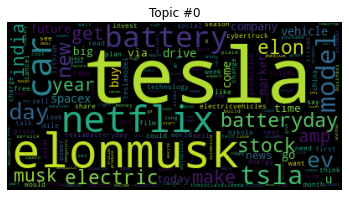

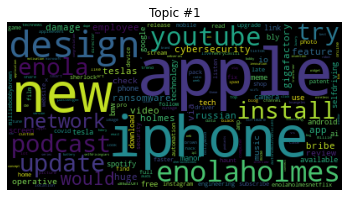

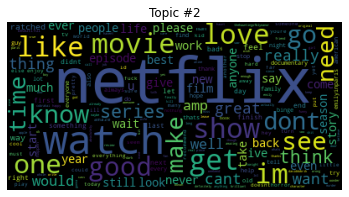

In [ ]:
for t in range(lda.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda.show_topic(t,200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.savefig("Topic_"+ str(t)+".png")

In [ ]:
data=df.copy(deep=True)

In [ ]:
data.describe()

,company,text,cleaned_text,cleaner1_text
count,48576,48576,48576,48576
unique,3,48543,47858,47645
top,Netflix,Emily in Paris #Netflix,a russian operative tried to bribe an employee...,"[russian, operative, try, bribe, employee, ins..."
freq,24666,5,52,58


In [ ]:
data=data.reset_index()

In [ ]:
data.new_date.dt.day.unique()

array([10, 25, 11, 20, 24, 26,  2, 12, 27, 29,  3, 21, 22,  8, 30,  1,  9,
       28,  5,  4,  7,  6, 23])

In [ ]:
data.columns

Index(['new_date', 'company', 'text', 'cleaned_text', 'cleaner1_text'], dtype='object')

In [ ]:
data['timestamp'] = pd.to_datetime(data['new_date']).dt.date
data.head()

,new_date,company,text,cleaned_text,cleaner1_text,timestamp
0,2020-10-10 02:13:00,Apple,"#Apple I won the prize, and while completing t...",apple i won the prize and while completing the...,"[apple, prize, complete, data, malfunction, oc...",2020-10-10
1,2020-09-25 13:34:00,Apple,Correction over shorts!!! #NASDAQ #nyse #tesla...,correction over shorts nasdaq nyse tesla apple...,"[correction, short, nasdaq, nyse, tesla, apple...",2020-09-25
2,2020-10-10 05:14:00,Apple,I think it’s time that #Apple releases an army...,i think its time that apple releases an army b...,"[think, time, apple, release, army, bomb, emoj...",2020-10-10
3,2020-10-11 17:23:00,Apple,@YourAnonCentral @Apple @telegram Oh good just...,youranoncentral apple telegram oh good just we...,"[youranoncentral, apple, telegram, oh, good, g...",2020-10-11
4,2020-09-25 12:34:00,Apple,Twitter security: physical security keys for s...,twitter security physical security keys for st...,"[twitter, security, physical, security, key, s...",2020-09-25


In [ ]:
firms_agg = data.groupby(["company","timestamp"]).cleaner1_text.agg(sum).reset_index()
firms_agg.head()

,company,timestamp,cleaner1_text
0,Apple,2020-09-20,"[upgraded, io, appleevent, apple, promise, hav..."
1,Apple,2020-09-21,"[samsung, taiwan, semiconductor, manufacture, ..."
2,Apple,2020-09-22,"[think, apple, user, excite, widget, wait, unt..."
3,Apple,2020-09-23,"[hi, im, look, way, remove, icloud, permanentl..."
4,Apple,2020-09-24,"[apple, io, squash, bug, cyrusgooddays, step, ..."


In [ ]:
firms_agg

,company,timestamp,cleaner1_text
0,Apple,2020-09-20,"[upgraded, io, appleevent, apple, promise, hav..."
1,Apple,2020-09-21,"[samsung, taiwan, semiconductor, manufacture, ..."
2,Apple,2020-09-22,"[think, apple, user, excite, widget, wait, unt..."
3,Apple,2020-09-23,"[hi, im, look, way, remove, icloud, permanentl..."
4,Apple,2020-09-24,"[apple, io, squash, bug, cyrusgooddays, step, ..."
...,...,...,...
64,Tesla,2020-10-08,"[ive, lately, experiment, unreal, engine, powe..."
65,Tesla,2020-10-09,"[elonmusk, rgvaerialphotos, spacex, hyperloop,..."
66,Tesla,2020-10-10,"[like, tesla, elonmusk, tesla, saturdaythought..."
67,Tesla,2020-10-11,"[elonmusk, ampor, tesla, software, team, futur..."


In [ ]:
firm_tokens_agg = firms_agg.cleaner1_text.values
common_dictionary_agg = Dictionary(firm_tokens_agg)
common_corpus_agg = [common_dictionary.doc2bow(text) for text in firm_tokens_agg]

In [ ]:
topic_props = [lda.get_document_topics(doc,minimum_probability=0) for doc in common_corpus_agg]
topic_props_df = pd.DataFrame(topic_props)
topic_props_df.head()

,0,1,2
0,"(0, 0.1949613)","(1, 0.53366816)","(2, 0.2713706)"
1,"(0, 0.18579452)","(1, 0.5515495)","(2, 0.26265597)"
2,"(0, 0.23518263)","(1, 0.51614326)","(2, 0.24867411)"
3,"(0, 0.21002173)","(1, 0.519577)","(2, 0.2704012)"
4,"(0, 0.22491322)","(1, 0.54580003)","(2, 0.22928673)"


In [ ]:
for each in topic_props_df.columns:
    firms_agg[each] = topic_props_df[each].apply(lambda x: x[1])
firms_agg.head()

,company,timestamp,cleaner1_text,0,1,2
0,Apple,2020-09-20,"[upgraded, io, appleevent, apple, promise, hav...",0.194961,0.533668,0.271371
1,Apple,2020-09-21,"[samsung, taiwan, semiconductor, manufacture, ...",0.185795,0.551549,0.262656
2,Apple,2020-09-22,"[think, apple, user, excite, widget, wait, unt...",0.235183,0.516143,0.248674
3,Apple,2020-09-23,"[hi, im, look, way, remove, icloud, permanentl...",0.210022,0.519577,0.270401
4,Apple,2020-09-24,"[apple, io, squash, bug, cyrusgooddays, step, ...",0.224913,0.545800,0.229287


In [ ]:
firms_agg.to_csv(r'3topicmodeldoc-topic-matrix.csv')

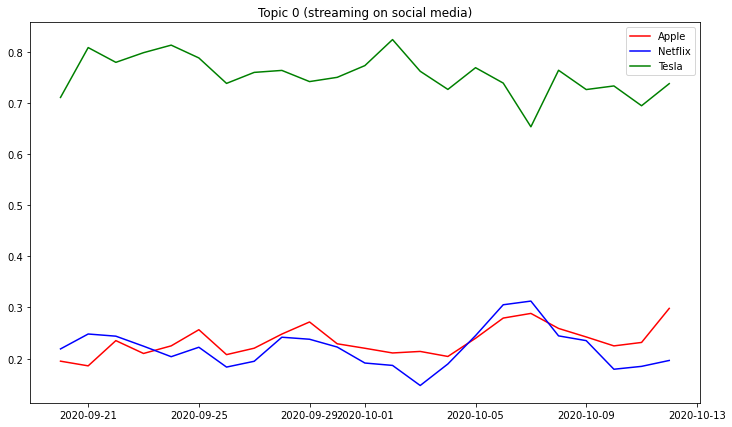

In [ ]:
firms_agg.sort_values(["company","timestamp"])

apple = firms_agg[firms_agg.company=="Apple"]
tesla = firms_agg[firms_agg.company == "Tesla"]
netflix = firms_agg[firms_agg.company == "Netflix"]
fig = plt.figure(figsize=(12, 7))
plt.plot(apple["timestamp"], apple[0], "r-", label="Apple")
plt.plot(netflix["timestamp"], netflix[0], "b-", label="Netflix")
plt.plot(tesla["timestamp"], tesla[0], "g-", label="Tesla")
plt.legend()
plt.title("Topic 0 (streaming on social media)")
plt.show()

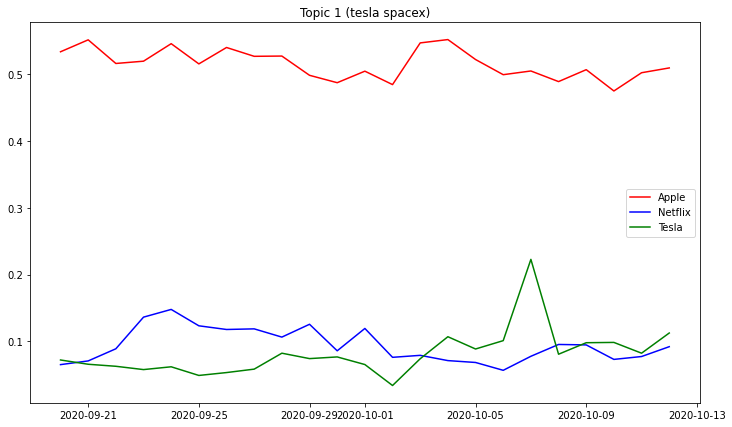

In [ ]:

fig = plt.figure(figsize=(12, 7))
plt.plot(apple["timestamp"], apple[1], "r-", label="Apple")
plt.plot(netflix["timestamp"], netflix[1], "b-", label="Netflix")
plt.plot(tesla["timestamp"], tesla[1], "g-", label="Tesla")
plt.legend()
plt.title("Topic 1 (tesla spacex)")
plt.show()

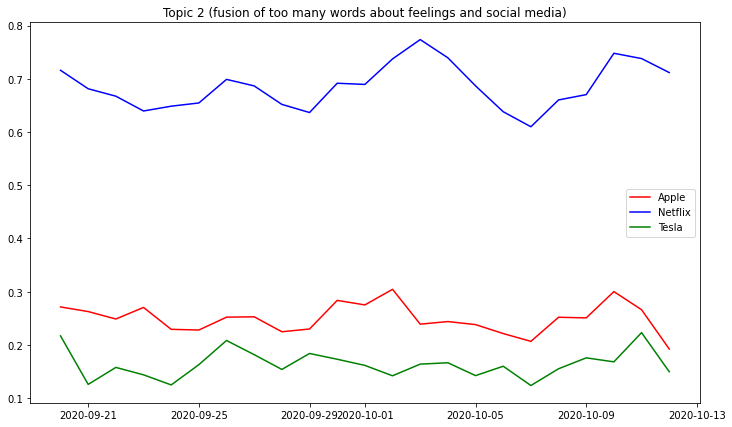

In [ ]:

fig = plt.figure(figsize=(12, 7))
plt.plot(apple["timestamp"], apple[2], "r-", label="Apple")
plt.plot(netflix["timestamp"], netflix[2], "b-", label="Netflix")
plt.plot(tesla["timestamp"], tesla[2], "g-", label="Tesla")
plt.legend()
plt.title("Topic 2 (fusion of too many words about feelings and social media)")
plt.show()

We don't see much variation in how frequently the three topics are discussed over time. It seems that tweets relating to certain companies talked about generally the same topics irrespective of when they were posted. This could be because our time frame is so short, or because we have already divided the data by company and tweets about these companies are inherently related to a certain number of topics.

**Question 6**

In [ ]:
lda1 = LdaModel(common_corpus, num_topics = 20, 
              id2word = common_dictionary, passes = 5,
              random_state = 1234)

In [ ]:
for t in range(lda1.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda1.show_topic(t,200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.savefig("Topic_"+ str(t)+".png")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
topic_props1 = [lda1.get_document_topics(doc,minimum_probability=0) for doc in common_corpus_agg]
topic_props_df1 = pd.DataFrame(topic_props1)
topic_props_df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,"(0, 0.05055596)","(1, 0.025089845)","(2, 0.018328441)","(3, 0.03398656)","(4, 0.022112984)","(5, 0.04715423)","(6, 0.018442767)","(7, 0.04867817)","(8, 0.028927512)","(9, 0.10884822)","(10, 0.039054204)","(11, 0.022235539)","(12, 0.021754071)","(13, 0.109341465)","(14, 0.21465014)","(15, 0.021800982)","(16, 0.07793036)","(17, 0.022994816)","(18, 0.030012822)","(19, 0.038100895)"
1,"(0, 0.042639975)","(1, 0.02161963)","(2, 0.018808266)","(3, 0.034974612)","(4, 0.022823399)","(5, 0.057300325)","(6, 0.015685365)","(7, 0.056246787)","(8, 0.018517913)","(9, 0.10561303)","(10, 0.022425888)","(11, 0.03128101)","(12, 0.024152389)","(13, 0.11186408)","(14, 0.21597873)","(15, 0.020013748)","(16, 0.08386676)","(17, 0.02273323)","(18, 0.029674022)","(19, 0.04378084)"
2,"(0, 0.053523738)","(1, 0.027329316)","(2, 0.029969078)","(3, 0.032935333)","(4, 0.024841715)","(5, 0.058192026)","(6, 0.021230748)","(7, 0.054197665)","(8, 0.026589839)","(9, 0.096957505)","(10, 0.036182776)","(11, 0.024894295)","(12, 0.024222957)","(13, 0.11130853)","(14, 0.16920434)","(15, 0.019938959)","(16, 0.09137082)","(17, 0.02226609)","(18, 0.03260401)","(19, 0.042240262)"
3,"(0, 0.08152608)","(1, 0.021217221)","(2, 0.021198407)","(3, 0.034845192)","(4, 0.025598805)","(5, 0.05623769)","(6, 0.016147835)","(7, 0.049641974)","(8, 0.023838528)","(9, 0.09680585)","(10, 0.026275884)","(11, 0.028111463)","(12, 0.022502575)","(13, 0.12127567)","(14, 0.16069637)","(15, 0.02223504)","(16, 0.082797185)","(17, 0.020837096)","(18, 0.04314841)","(19, 0.045062702)"
4,"(0, 0.061610006)","(1, 0.023176204)","(2, 0.021748617)","(3, 0.03656004)","(4, 0.024777632)","(5, 0.044911377)","(6, 0.020276405)","(7, 0.06394241)","(8, 0.019643074)","(9, 0.08574236)","(10, 0.029798351)","(11, 0.030730125)","(12, 0.025007578)","(13, 0.11954639)","(14, 0.16814081)","(15, 0.022966003)","(16, 0.09109948)","(17, 0.02688089)","(18, 0.039927952)","(19, 0.043514315)"


In [ ]:
for each in topic_props_df1.columns:
    firms_agg[each] = topic_props_df1[each].apply(lambda x: x[1])
firms_agg.head()

,company,timestamp,cleaner1_text,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Apple,2020-09-20,"[upgraded, io, appleevent, apple, promise, hav...",0.050556,0.025090,0.018328,0.033987,0.022113,0.047154,0.018443,0.048678,0.028928,0.108848,0.039054,0.022236,0.021754,0.109341,0.214650,0.021801,0.077930,0.022995,0.030013,0.038101
1,Apple,2020-09-21,"[samsung, taiwan, semiconductor, manufacture, ...",0.042640,0.021620,0.018808,0.034975,0.022823,0.057300,0.015685,0.056247,0.018518,0.105613,0.022426,0.031281,0.024152,0.111864,0.215979,0.020014,0.083867,0.022733,0.029674,0.043781
2,Apple,2020-09-22,"[think, apple, user, excite, widget, wait, unt...",0.053524,0.027329,0.029969,0.032935,0.024842,0.058192,0.021231,0.054198,0.026590,0.096958,0.036183,0.024894,0.024223,0.111309,0.169204,0.019939,0.091371,0.022266,0.032604,0.042240
3,Apple,2020-09-23,"[hi, im, look, way, remove, icloud, permanentl...",0.081526,0.021217,0.021198,0.034845,0.025599,0.056238,0.016148,0.049642,0.023839,0.096806,0.026276,0.028111,0.022503,0.121276,0.160696,0.022235,0.082797,0.020837,0.043148,0.045063
4,Apple,2020-09-24,"[apple, io, squash, bug, cyrusgooddays, step, ...",0.061610,0.023176,0.021749,0.036560,0.024778,0.044911,0.020276,0.063942,0.019643,0.085742,0.029798,0.030730,0.025008,0.119546,0.168141,0.022966,0.091099,0.026881,0.039928,0.043514


In [ ]:
firms_agg.to_csv(r'20topicmodeldoc-topic-matrix.csv')

In [ ]:
apple = firms_agg[firms_agg.company=="Apple"]
tesla = firms_agg[firms_agg.company == "Tesla"]
netflix = firms_agg[firms_agg.company == "Netflix"]

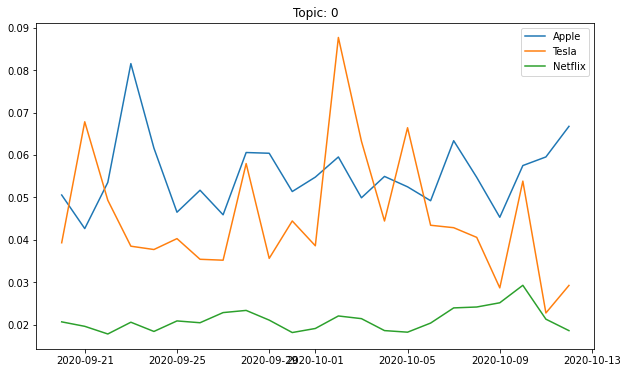

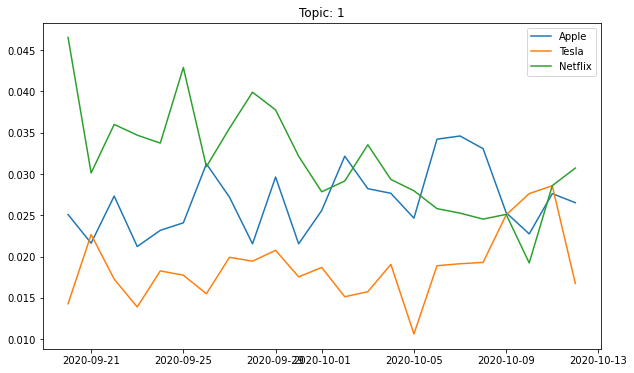

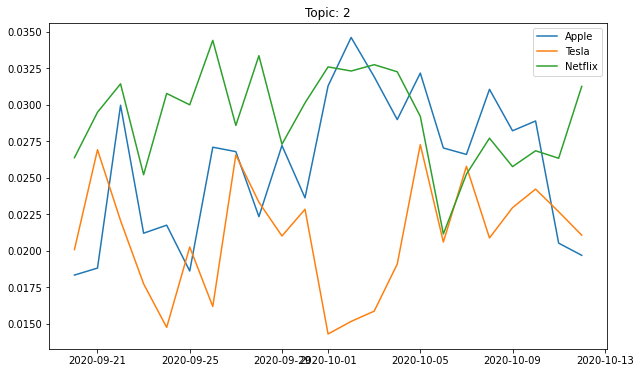

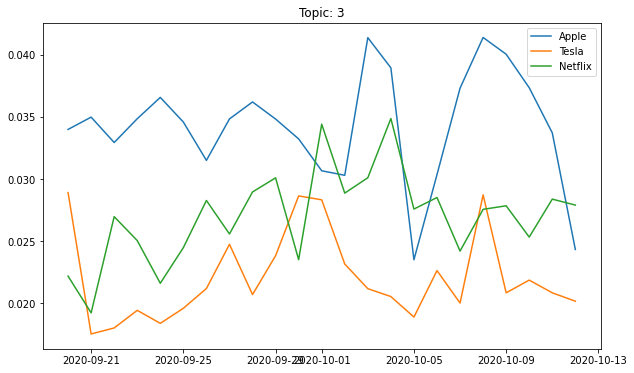

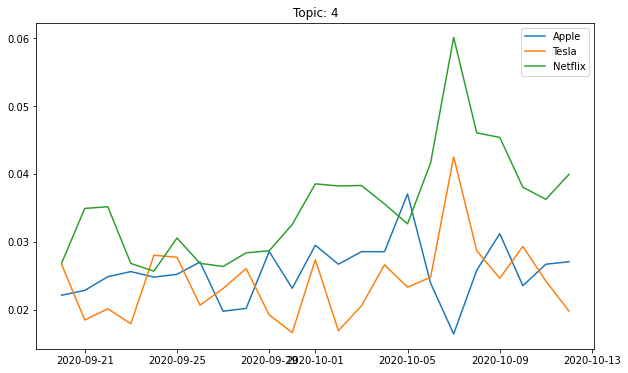

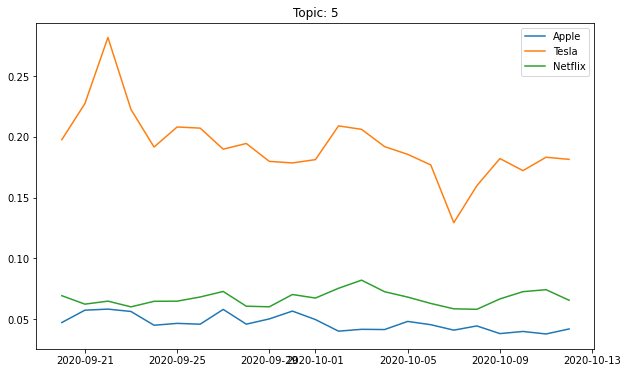

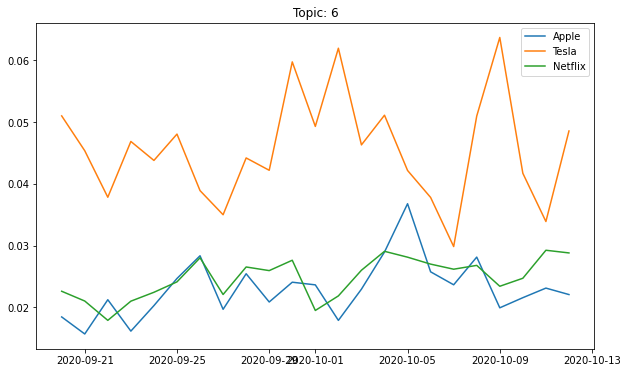

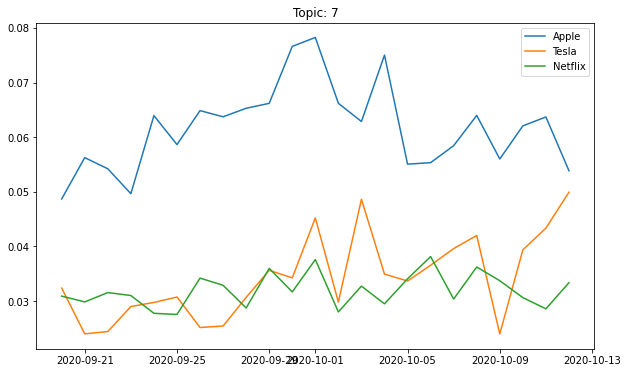

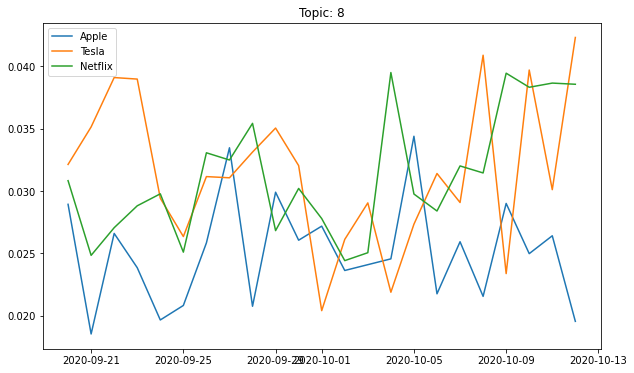

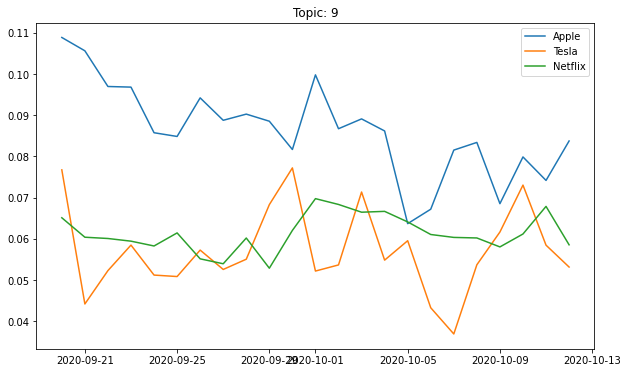

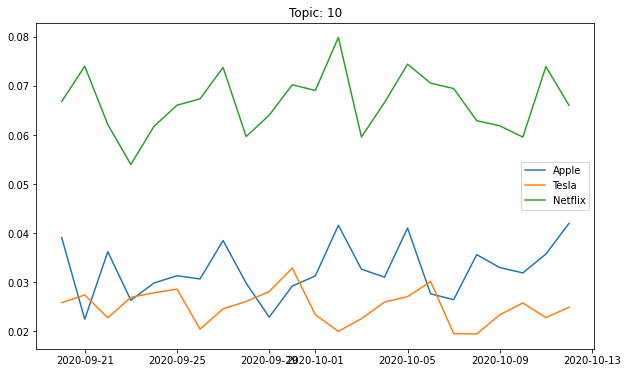

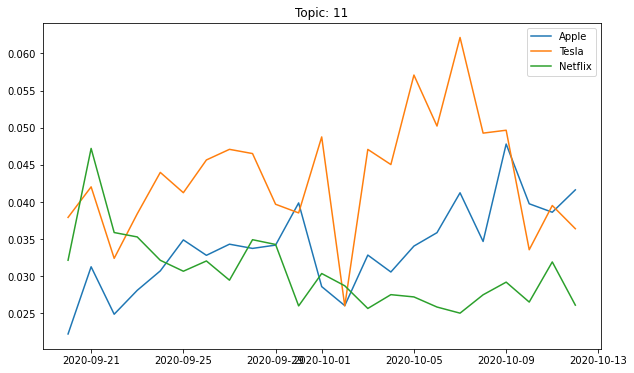

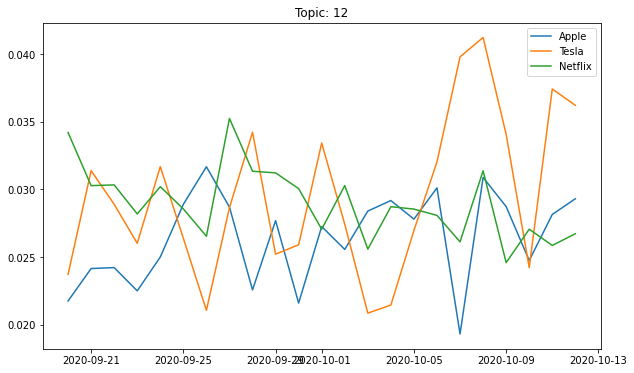

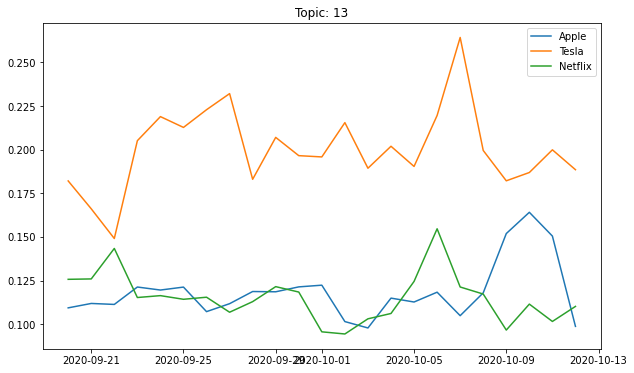

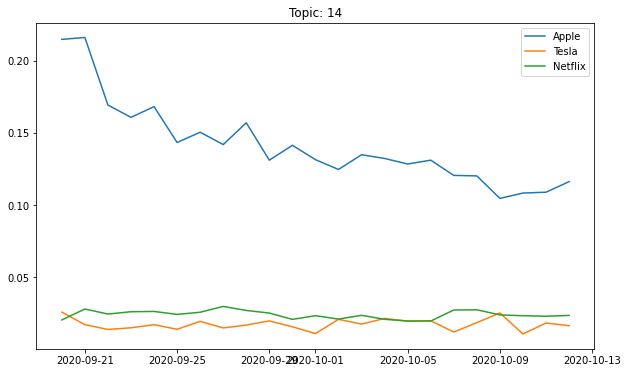

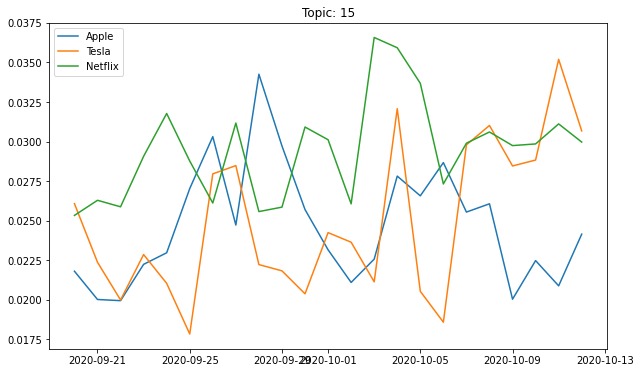

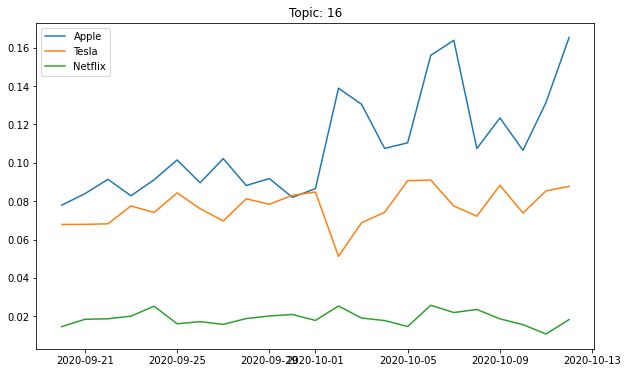

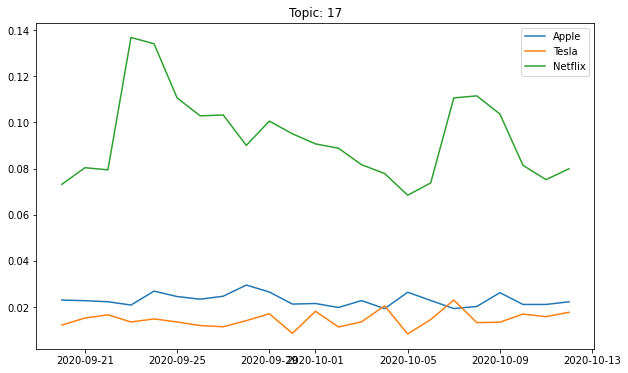

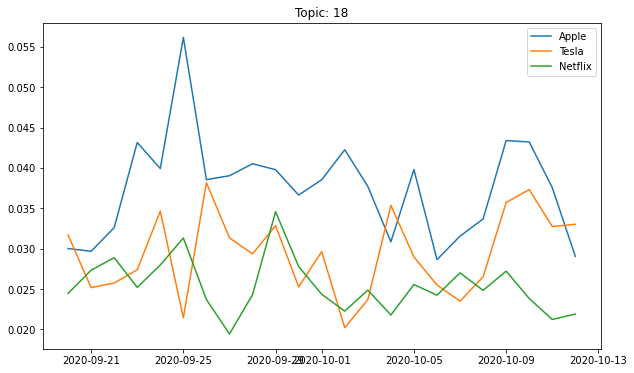

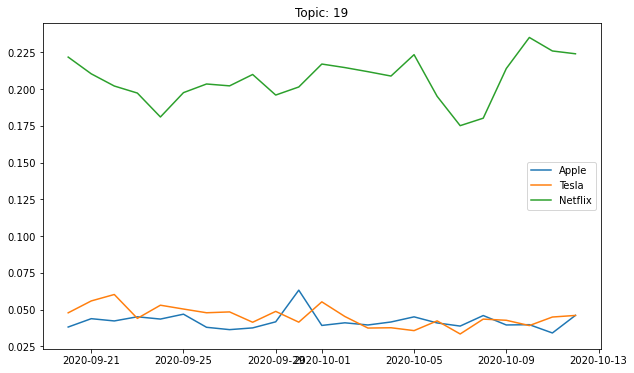

In [ ]:
companies = [apple, tesla, netflix]

for top in firms_agg.iloc[:,3:]:
    fig = plt.figure(figsize=(10, 6))
    #plot for each topic
    for firm in companies:
        
        plt.plot(firm["timestamp"], firm[top], label= firm.iloc[0,0])
        
    plt.legend()
    plt.title(f"Topic: {top}")
    plt.show()

When we increase the number of topics to from 3 to 20, we see a lot more variation than before over time. This could be because we are forcing the model to choose topics from across different companies by setting the number of topics greater than the number of companies we are studying. However, with this many topics, some are more informative than others. There are some topics which are extremely vague, containing high numbers of words like "year" or "lot". Others are much more informative, like those which include "space" or "streaming".

In [56]:
test= pd.read_csv(r'/content/drive/My Drive/test_data.csv')

In [57]:
test

,date,company,text
0,2020-12-01,Amazon,An everyday hero. A big shoutout to Amazon dri...
1,2020-12-04,Amazon,"Perry, a general manager at one of our fulfill..."
2,2020-12-11,Amazon,#AmazonFutureEngineer is providing $2 million ...
3,2020-11-23,Amazon,"ICYMI: Amazon Pharmacy, a new store from @Amaz..."
4,2020-11-17,Amazon,So pleased to see Amazon honoring Native Ameri...


In [58]:
#data['timestamp'] = pd.to_datetime(data['new_date']).dt.date

In [59]:
test["new_date"] = pd.to_datetime(test.date)
test= test.drop('date',axis=1)
test.set_index('new_date',inplace=True)
test.head()

,company,text
new_date,,
2020-12-01,Amazon,An everyday hero. A big shoutout to Amazon dri...
2020-12-04,Amazon,"Perry, a general manager at one of our fulfill..."
2020-12-11,Amazon,#AmazonFutureEngineer is providing $2 million ...
2020-11-23,Amazon,"ICYMI: Amazon Pharmacy, a new store from @Amaz..."
2020-11-17,Amazon,So pleased to see Amazon honoring Native Ameri...


In [60]:
test['cleaned_text'] = test.text.apply(clean_text)
test.cleaned_text.head()

new_date
2020-12-01    an everyday hero a big shoutout to amazon driv...
2020-12-04    perry a general manager at one of our fulfillm...
2020-12-11    amazonfutureengineer is providing  million to ...
2020-11-23    icymi amazon pharmacy a new store from amazon ...
2020-11-17    so pleased to see amazon honoring native ameri...
Name: cleaned_text, dtype: object

In [61]:
test['cleaner1_text'] = test.cleaned_text.apply(cleaner1_text)

In [62]:
test

,company,text,cleaned_text,cleaner1_text
new_date,,,,
2020-12-01,Amazon,An everyday hero. A big shoutout to Amazon dri...,an everyday hero a big shoutout to amazon driv...,"[everyday, hero, big, shoutout, amazon, driver..."
2020-12-04,Amazon,"Perry, a general manager at one of our fulfill...",perry a general manager at one of our fulfillm...,"[perry, general, manager, one, fulfillment, ce..."
2020-12-11,Amazon,#AmazonFutureEngineer is providing $2 million ...,amazonfutureengineer is providing million to ...,"[amazonfutureengineer, provide, million, cmucs..."
2020-11-23,Amazon,"ICYMI: Amazon Pharmacy, a new store from @Amaz...",icymi amazon pharmacy a new store from amazon ...,"[icymi, amazon, pharmacy, new, store, amazon, ..."
2020-11-17,Amazon,So pleased to see Amazon honoring Native Ameri...,so pleased to see amazon honoring native ameri...,"[pleased, see, amazon, honor, native, american..."


In [63]:
test=test.reset_index()
test= test.sort_values(by=['new_date'])
test['timestamp'] = pd.to_datetime(test['new_date']).dt.date
test

,new_date,company,text,cleaned_text,cleaner1_text,timestamp
4,2020-11-17,Amazon,So pleased to see Amazon honoring Native Ameri...,so pleased to see amazon honoring native ameri...,"[pleased, see, amazon, honor, native, american...",2020-11-17
3,2020-11-23,Amazon,"ICYMI: Amazon Pharmacy, a new store from @Amaz...",icymi amazon pharmacy a new store from amazon ...,"[icymi, amazon, pharmacy, new, store, amazon, ...",2020-11-23
0,2020-12-01,Amazon,An everyday hero. A big shoutout to Amazon dri...,an everyday hero a big shoutout to amazon driv...,"[everyday, hero, big, shoutout, amazon, driver...",2020-12-01
1,2020-12-04,Amazon,"Perry, a general manager at one of our fulfill...",perry a general manager at one of our fulfillm...,"[perry, general, manager, one, fulfillment, ce...",2020-12-04
2,2020-12-11,Amazon,#AmazonFutureEngineer is providing $2 million ...,amazonfutureengineer is providing million to ...,"[amazonfutureengineer, provide, million, cmucs...",2020-12-11


In [64]:
firm_tokens1 = test.cleaner1_text.values

In [65]:
common_dictionary1 = Dictionary(firm_tokens1)
common_corpus1 = [common_dictionary1.doc2bow(text) for text in firm_tokens1]

In [66]:
topic_props2 = [lda1.get_document_topics(doc,minimum_probability=0) for doc in common_corpus1]
topic_props_df2 = pd.DataFrame(topic_props2)
topic_props_df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,"(0, 0.0023809522)","(1, 0.0023809522)","(2, 0.0023809522)","(3, 0.2660898)","(4, 0.0023809522)","(5, 0.0023809522)","(6, 0.0023809522)","(7, 0.0023809522)","(8, 0.098279275)","(9, 0.3959422)","(10, 0.20159344)","(11, 0.0023809522)","(12, 0.0023809522)","(13, 0.0023809525)","(14, 0.0023809522)","(15, 0.0023809522)","(16, 0.0023809522)","(17, 0.0023809522)","(18, 0.0023809522)","(19, 0.0023809522)"
1,"(0, 0.0022727272)","(1, 0.047822095)","(2, 0.0022727272)","(3, 0.2074)","(4, 0.0022727272)","(5, 0.0022727272)","(6, 0.0022727272)","(7, 0.0022727272)","(8, 0.04807606)","(9, 0.27315798)","(10, 0.0022727272)","(11, 0.0022727272)","(12, 0.0022727272)","(13, 0.2555278)","(14, 0.0022727272)","(15, 0.053351942)","(16, 0.0022727272)","(17, 0.08511865)","(18, 0.0022727272)","(19, 0.0022727272)"
2,"(0, 0.061767418)","(1, 0.0029411765)","(2, 0.0029411765)","(3, 0.19359133)","(4, 0.0029411765)","(5, 0.0029411765)","(6, 0.0029411765)","(7, 0.0029411765)","(8, 0.0029411765)","(9, 0.0029411768)","(10, 0.0029411765)","(11, 0.06833831)","(12, 0.0029411765)","(13, 0.5645779)","(14, 0.0029411765)","(15, 0.067607425)","(16, 0.0029411765)","(17, 0.0029411765)","(18, 0.0029411765)","(19, 0.0029411765)"
3,"(0, 0.046532303)","(1, 0.0021739132)","(2, 0.0021739132)","(3, 0.1228169)","(4, 0.045967363)","(5, 0.0021739132)","(6, 0.0021739132)","(7, 0.045893326)","(8, 0.0021739132)","(9, 0.0021739132)","(10, 0.0021739132)","(11, 0.045654234)","(12, 0.0021739132)","(13, 0.5101395)","(14, 0.0638421)","(15, 0.0021739132)","(16, 0.04622304)","(17, 0.0021739132)","(18, 0.0021739132)","(19, 0.04901813)"
4,"(0, 0.0038461538)","(1, 0.0038461538)","(2, 0.09023996)","(3, 0.08490409)","(4, 0.0038461538)","(5, 0.0038461538)","(6, 0.0038461538)","(7, 0.0038461538)","(8, 0.0038461538)","(9, 0.24591956)","(10, 0.0038461538)","(11, 0.0038461538)","(12, 0.0038461538)","(13, 0.2598306)","(14, 0.003846154)","(15, 0.0038461538)","(16, 0.003846154)","(17, 0.0038461538)","(18, 0.0038461538)","(19, 0.26141348)"


In [67]:
for each in topic_props_df2.columns:
    test[each] = topic_props_df2[each].apply(lambda x: x[1])
test.head()

,new_date,company,text,cleaned_text,cleaner1_text,timestamp,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
4,2020-11-17,Amazon,So pleased to see Amazon honoring Native Ameri...,so pleased to see amazon honoring native ameri...,"[pleased, see, amazon, honor, native, american...",2020-11-17,0.003846,0.003846,0.090240,0.084904,0.003846,0.003846,0.003846,0.003846,0.003846,0.245920,0.003846,0.003846,0.003846,0.259831,0.003846,0.003846,0.003846,0.003846,0.003846,0.261413
3,2020-11-23,Amazon,"ICYMI: Amazon Pharmacy, a new store from @Amaz...",icymi amazon pharmacy a new store from amazon ...,"[icymi, amazon, pharmacy, new, store, amazon, ...",2020-11-23,0.046532,0.002174,0.002174,0.122817,0.045967,0.002174,0.002174,0.045893,0.002174,0.002174,0.002174,0.045654,0.002174,0.510140,0.063842,0.002174,0.046223,0.002174,0.002174,0.049018
0,2020-12-01,Amazon,An everyday hero. A big shoutout to Amazon dri...,an everyday hero a big shoutout to amazon driv...,"[everyday, hero, big, shoutout, amazon, driver...",2020-12-01,0.002381,0.002381,0.002381,0.266090,0.002381,0.002381,0.002381,0.002381,0.098279,0.395942,0.201593,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381
1,2020-12-04,Amazon,"Perry, a general manager at one of our fulfill...",perry a general manager at one of our fulfillm...,"[perry, general, manager, one, fulfillment, ce...",2020-12-04,0.002273,0.047822,0.002273,0.207400,0.002273,0.002273,0.002273,0.002273,0.048076,0.273158,0.002273,0.002273,0.002273,0.255528,0.002273,0.053352,0.002273,0.085119,0.002273,0.002273
2,2020-12-11,Amazon,#AmazonFutureEngineer is providing $2 million ...,amazonfutureengineer is providing million to ...,"[amazonfutureengineer, provide, million, cmucs...",2020-12-11,0.061767,0.002941,0.002941,0.193591,0.002941,0.002941,0.002941,0.002941,0.002941,0.002941,0.002941,0.068338,0.002941,0.564578,0.002941,0.067607,0.002941,0.002941,0.002941,0.002941


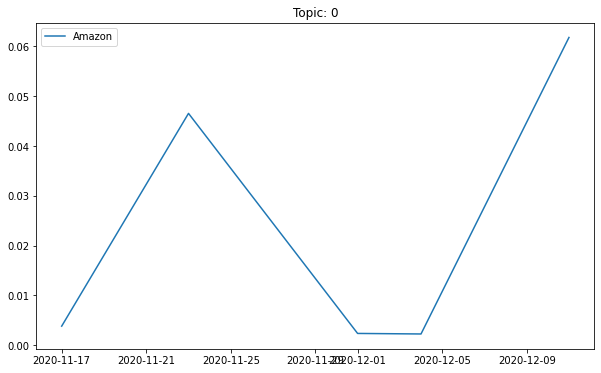

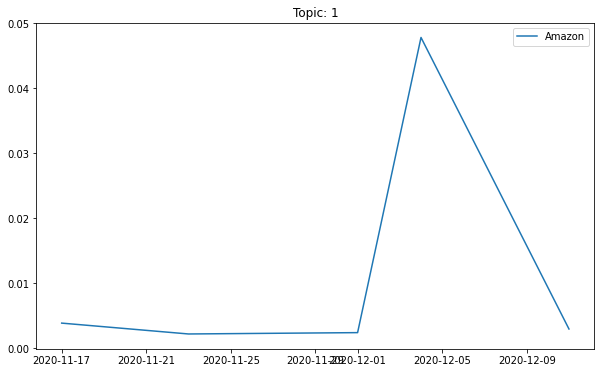

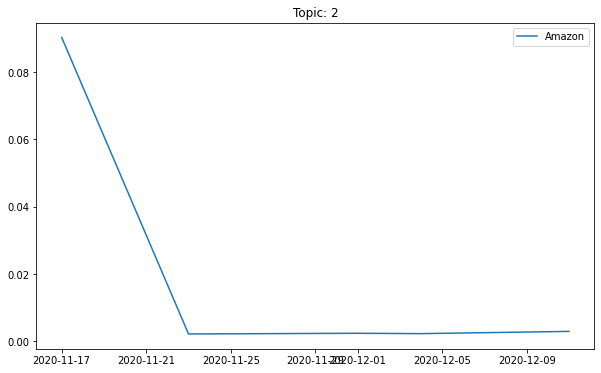

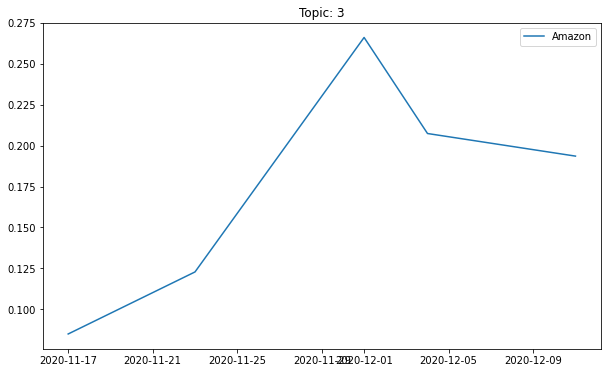

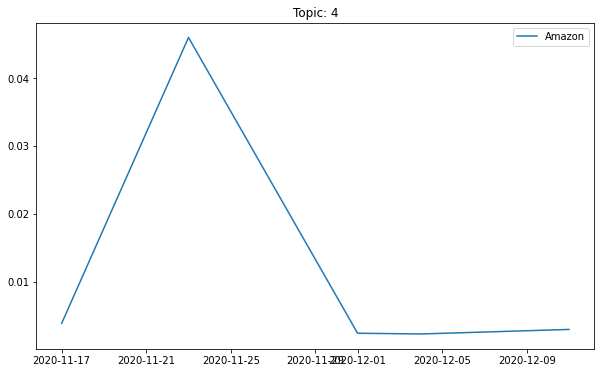

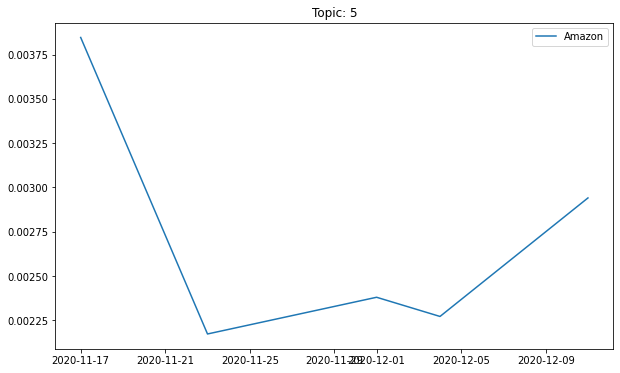

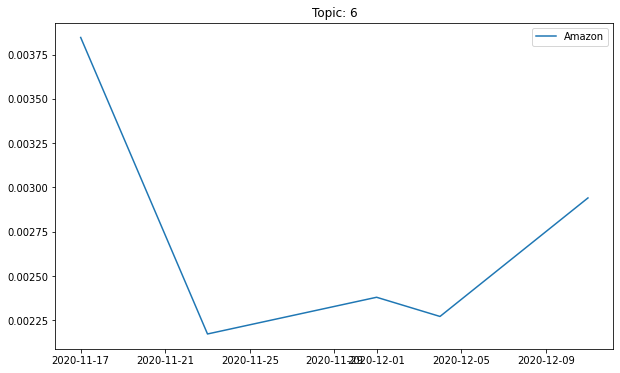

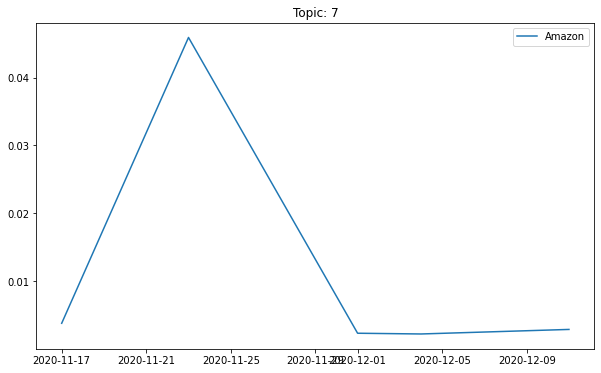

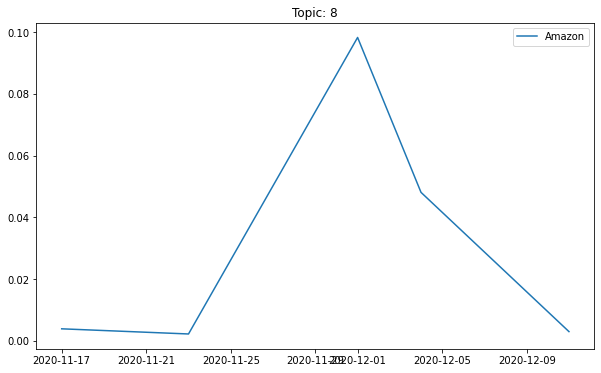

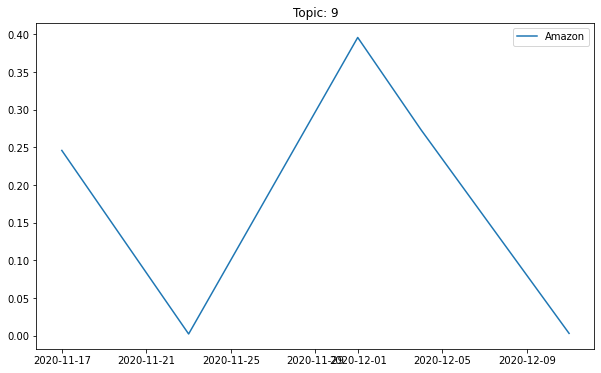

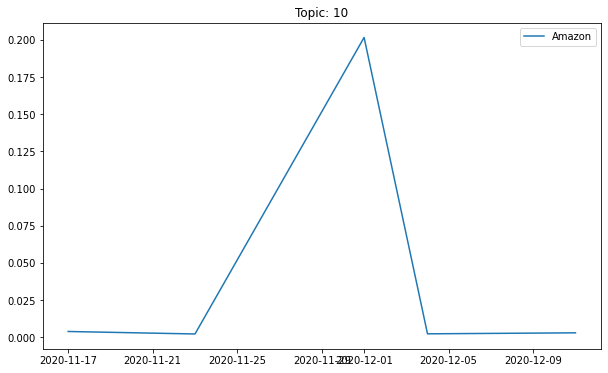

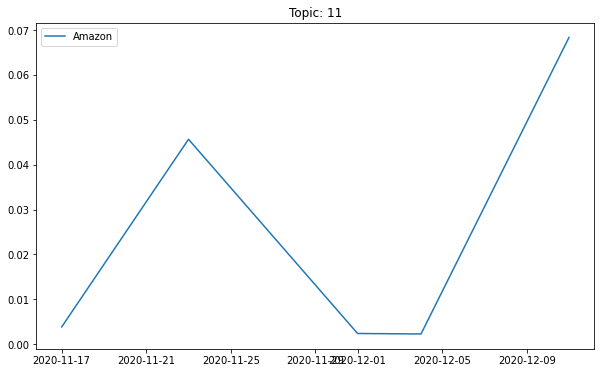

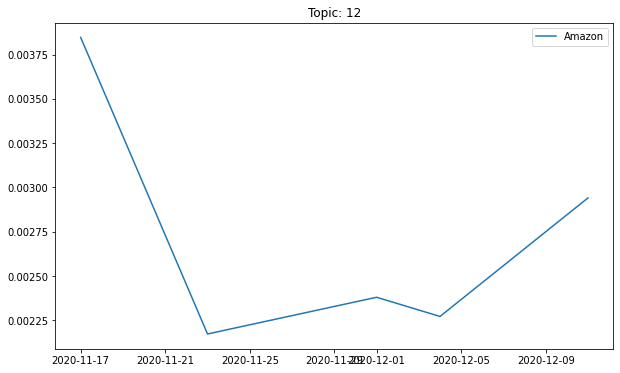

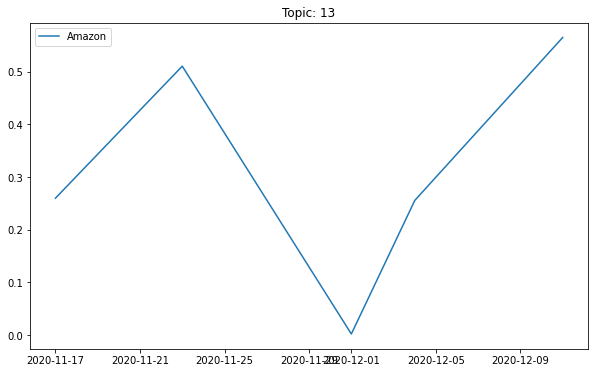

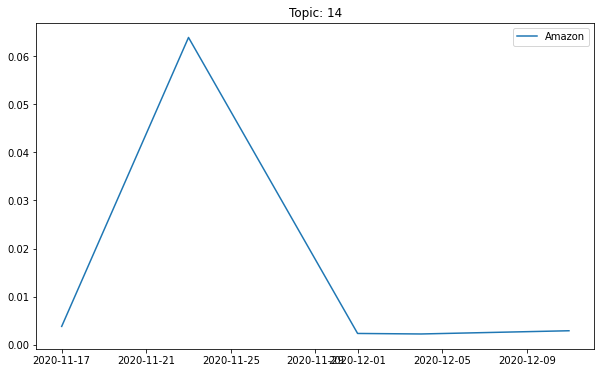

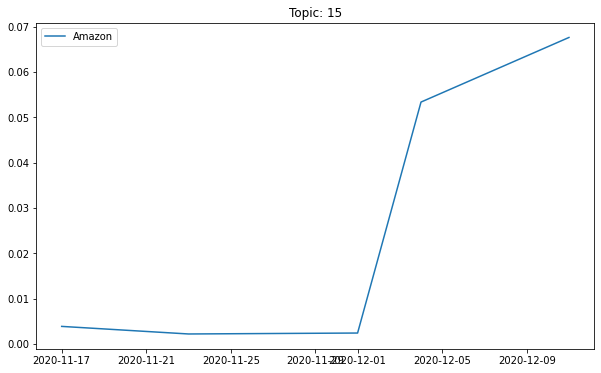

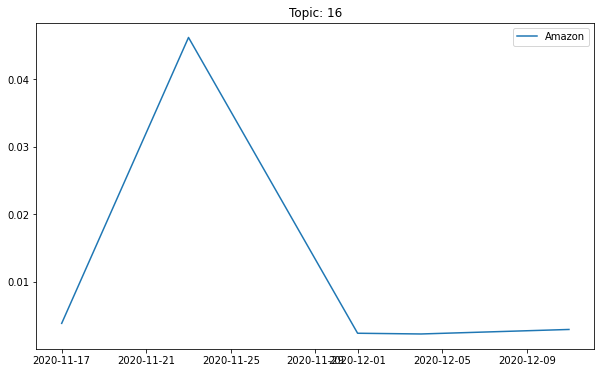

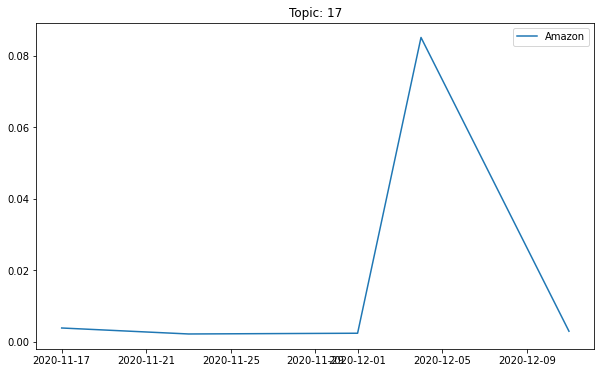

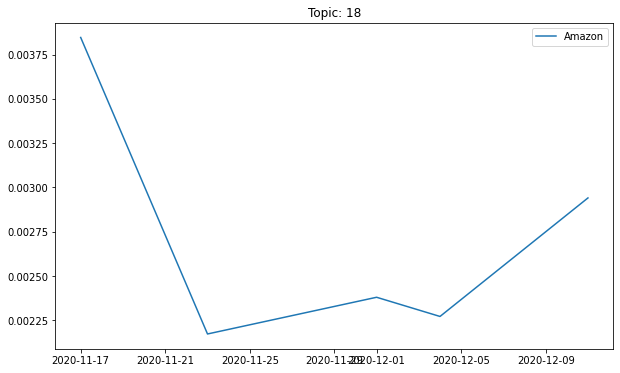

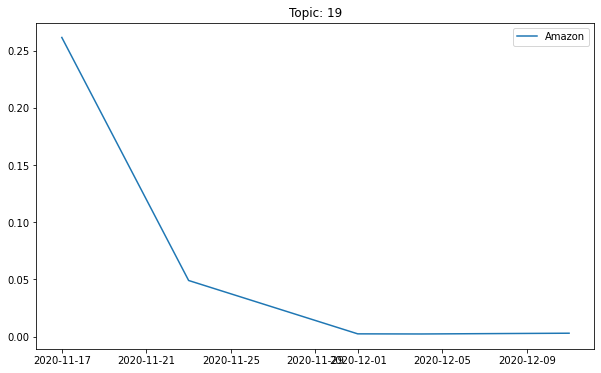

In [68]:

for top in test.iloc[:,6:]:
    fig = plt.figure(figsize=(10, 6))
    #plot for each topic
    plt.plot(test["timestamp"], test[top], label= "Amazon")
        
    plt.legend()
    plt.title(f"Topic: {top}")
    plt.show()

Because some of our topics are so vague, it is difficult to gauge how accurately the model picked up on topics in the previously unseen tweets, although it is clear that it had some difficulty. This could be because we are now trying to generalize our model outside of the three original company-related tweets that it was formed on, since all of the new tweets relate to Amazon. If we wanted to better generalize our model, we could perhaps try and increase variety in the source data beyond the three original companies that we studied.

# Word Embeddings

In [69]:
# def cleaner2_text(text):
#   tokens = text.lower().split() #selects tokens as text
#   tokens = [re.sub('[^A-Za-z]',' ',el) for el in tokens]  #takes out numbers and punctutations
#   return ' '.join(tokens)

In [70]:
def generate_tokens(sentence_list):
    final_tokens = []
    for sentence in sentence_list:
        short_sen = re.sub(r'\b\w{20,1000000}\b', '',sentence) #remove all single words more than 20 characters
        new_text = re.sub("[^A-Za-z]"," ", short_sen)
        tokens = new_text.lower().split()
        #tokens = [re.sub('https[a-z]*',' ', el) for el in tokens] # takes out the url tags
        # tokens = [el for el in tokens if el not in sw] #remove sw not included in instructions
        if tokens!=[]:
            final_tokens.append(tokens)
    return final_tokens

In [71]:
nltk.download('punkt')
sw=set(stopwords.words("english"))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [72]:
df["sentences"] = df['text'].apply(lambda x: sent_tokenize(x))
df['we_text1'] = df.sentences.apply(generate_tokens)
df['we_text']=df['we_text1'].astype(str)
df['we_text'].iloc[0]
test4=df['we_text'].iloc[0]
test4

"[['apple', 'i', 'won', 'the', 'prize', 'and', 'while', 'completing', 'the', 'data', 'a', 'malfunction', 'occurred', 'in', 'the', 'browser', 'and', 'took', 'me', 'off', 'the', 'page', 'as', 'shown', 'in', 'the', 'pictures'], ['please', 'hand', 'me', 'the', 'prize', 'if', 'it', 'is', 'correct'], ['https', 't', 'co', 'nuvjp', 'fix']]"

In [73]:
df['we_text']

new_date
2020-10-10 02:13:00    [['apple', 'i', 'won', 'the', 'prize', 'and', ...
2020-09-25 13:34:00    [['correction', 'over', 'shorts'], ['nasdaq', ...
2020-10-10 05:14:00    [['i', 'think', 'it', 's', 'time', 'that', 'ap...
2020-10-11 17:23:00    [['youranoncentral', 'apple', 'telegram', 'oh'...
2020-09-25 12:34:00    [['twitter', 'security', 'physical', 'security...
                                             ...                        
2020-09-22 01:00:00    [['elonmusk', 'won', 't', 'be', 'very', 'happy...
2020-09-26 19:39:00    [['elonmusk', 'how', 'someone', 'without', 'jo...
2020-10-02 20:28:00    [['there', 'is', 'a', 'live', 'without', 'amaz...
2020-09-20 07:17:00    [['american', 'lung', 'association', 'switch',...
2020-10-06 21:39:00    [['soon', 'to', 'be', 'seen', 'in', 'israel', ...
Name: we_text, Length: 48576, dtype: object

### Model 1 & 2 (Test models to help form our final model)

In [74]:
model = Word2Vec(df['we_text1'].sum(), size=100, sg=1,window=5, min_count=1, seed=42)

In [75]:
technology=model.wv.most_similar("technology",topn=10)
technology=pd.DataFrame(technology)[0].to_list()
technology=re.compile('|'.join(technology))
technology

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


re.compile(r'innovation|tech|engineering|ai|technews|science|startup|electronics|gadget|smartphone',
re.UNICODE)

In [76]:
streaming=model.wv.most_similar('streaming',topn=10)
streaming=pd.DataFrame(streaming)[0].to_list()
streaming=re.compile('|'.join(streaming))
streaming

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


re.compile(r'platforms|vod|streamer|entertainment|roku|sports|services|television|iptv|ott',
re.UNICODE)

In [77]:
battery=model.wv.most_similar('battery',topn=10)
battery=pd.DataFrame(battery)[0].to_list()
battery=re.compile('|'.join(battery))
battery

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


re.compile(r'tabless|cells|cell|batteries|drain|body|connectivity|annual|shareholders|draining',
re.UNICODE)

The similar words are exceptionally accurate. The model performed excellently in identifying words that are close either in meaning or context to the key word we studied.

In [78]:
frequency = pd.DataFrame()
frequency['company'] = df.company
frequency.set_index(df.index)
frequency['technology'] = df['we_text'].astype(str).str.count(technology)
print('The total number of technology group words is',frequency['technology'].sum())

The total number of technology group words is 17642


In [79]:
frequency.head()

,company,technology
new_date,,
2020-10-10 02:13:00,Apple,0
2020-09-25 13:34:00,Apple,0
2020-10-10 05:14:00,Apple,0
2020-10-11 17:23:00,Apple,0
2020-09-25 12:34:00,Apple,0


Text(0.5, 0, '')

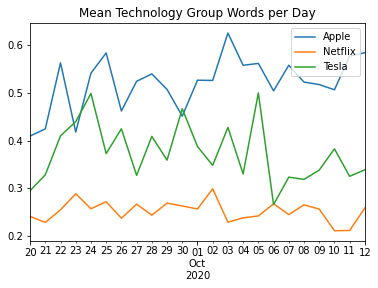

In [80]:
companies = ['Apple','Netflix','Tesla']
test = frequency.groupby(['company',pd.Grouper(freq='D')]).mean()
test.unstack(level=0).plot()
plt.legend(companies)
plt.title('Mean Technology Group Words per Day')
plt.xlabel('')

#### Original graph, do not run, for illustrative purposes only

In [81]:
# fig = plt.figure(figsize=(14, 12))
# ax = fig.add_subplot(1, 1, 1)
# ax.scatter(scatter_df['x'], scatter_df['y'])

# #Annotate each point with its word
# for word, pos in scatter_df.iterrows():
#     ax.annotate(word, pos)
# plt.show()

# ax.annotate('battery',(scatter_df.loc['battery'][0],scatter_df.loc['battery'][1]))
# ax.annotate('electric',(scatter_df.loc['electric'][0],scatter_df.loc['electric'][1]))
# ax.annotate('phone',(scatter_df.loc['phone'][0],scatter_df.loc['phone'][1]))
# ax.annotate('app',(scatter_df.loc['app'][0],scatter_df.loc['app'][1]))
# ax.annotate('movie',(scatter_df.loc['movie'][0],scatter_df.loc['movie'][1]))
# ax.annotate('stream',(scatter_df.loc['stream'][0],scatter_df.loc['stream'][1]))
# ax.annotate('download',(scatter_df.loc['download'][0],scatter_df.loc['download'][1]))
# ax.annotate('stock',(scatter_df.loc['stock'][0],scatter_df.loc['stock'][1]))
# ax.annotate('price',(scatter_df.loc['price'][0],scatter_df.loc['price'][1]))
# ax.annotate('ipad',(scatter_df.loc['ipad'][0],scatter_df.loc['ipad'][1]))
# ax.annotate('cantwait',(scatter_df.loc['cantwait'][0],scatter_df.loc['cantwait'][1]))
# ax.annotate('driveelectric',(scatter_df.loc['driveelectric'][0],scatter_df.loc['driveelectric'][1]))
# ax.annotate('whatamanwhatmultipleaudacitiesofmultiplevisionstotryandexecutephew',(scatter_df.loc['whatamanwhatmultipleaudacitiesofmultiplevisionstotryandexecutephew'][0],scatter_df.loc['whatamanwhatmultipleaudacitiesofmultiplevisionstotryandexecutephew'][1]))
# plt.show()

#### Graph of Model 2 (20 max characters per word)

In [82]:
# Get list of words for annotation of the scatter plot
vocab = list(model.wv.vocab)
X = model[vocab]

# Project them onto the 2 Dimensional space
tsne = TSNE(n_components=2,random_state=1234)
X_tsne = tsne.fit_transform(X)
# Create a DataFrame with words as index, and
# 2 dimensions as main columns (x-axis, y-axis)
scatter_df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


Text(13.9641, -28.180656, 'driveelectric')

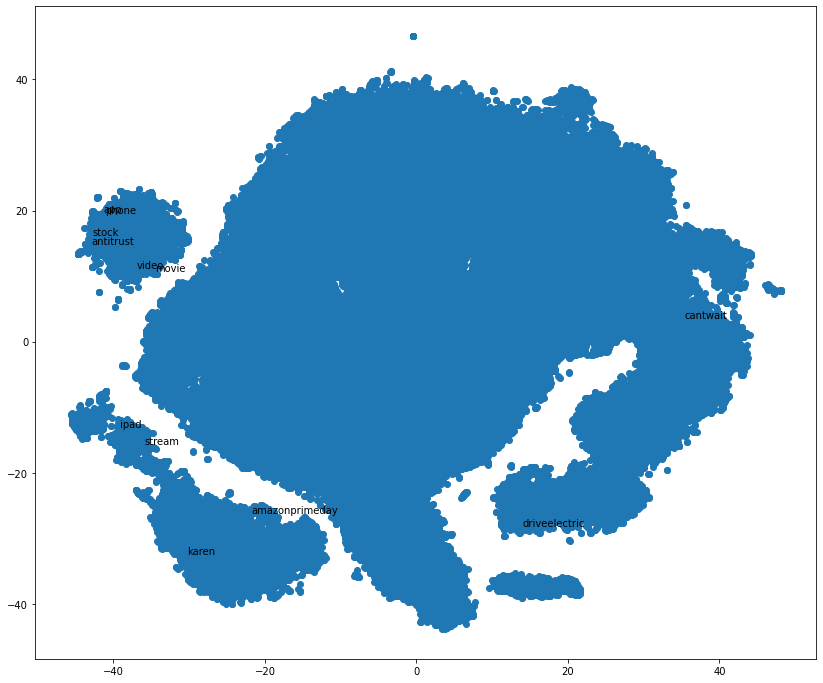

In [83]:
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(scatter_df['x'], scatter_df['y'])

# #Annotate each point with its word
# for word, pos in scatter_df.iterrows():
#     ax.annotate(word, pos)
# plt.show()

# ax.annotate('battery',(scatter_df.loc['battery'][0],scatter_df.loc['battery'][1]))
# ax.annotate('electric',(scatter_df.loc['electric'][0],scatter_df.loc['electric'][1]))
ax.annotate('phone',(scatter_df.loc['phone'][0],scatter_df.loc['phone'][1]))
ax.annotate('app',(scatter_df.loc['app'][0],scatter_df.loc['app'][1]))
ax.annotate('movie',(scatter_df.loc['movie'][0],scatter_df.loc['movie'][1]))
ax.annotate('stream',(scatter_df.loc['stream'][0],scatter_df.loc['stream'][1]))
ax.annotate('video',(scatter_df.loc['video'][0],scatter_df.loc['video'][1]))
ax.annotate('antitrust',(scatter_df.loc['antitrust'][0],scatter_df.loc['antitrust'][1]))
ax.annotate('amazonprimeday',(scatter_df.loc['amazonprimeday'][0],scatter_df.loc['amazonprimeday'][1]))
ax.annotate('karen',(scatter_df.loc['karen'][0],scatter_df.loc['karen'][1]))
# ax.annotate('download',(scatter_df.loc['download'][0],scatter_df.loc['download'][1]))
ax.annotate('stock',(scatter_df.loc['stock'][0],scatter_df.loc['stock'][1]))
# ax.annotate('price',(scatter_df.loc['price'][0],scatter_df.loc['price'][1]))
ax.annotate('ipad',(scatter_df.loc['ipad'][0],scatter_df.loc['ipad'][1]))
ax.annotate('cantwait',(scatter_df.loc['cantwait'][0],scatter_df.loc['cantwait'][1]))
ax.annotate('driveelectric',(scatter_df.loc['driveelectric'][0],scatter_df.loc['driveelectric'][1]))
# ax.annotate('whatamanwhatmultipleaudacitiesofmultiplevisionstotryandexecutephew',(scatter_df.loc['whatamanwhatmultipleaudacitiesofmultiplevisionstotryandexecutephew'][0],scatter_df.loc['whatamanwhatmultipleaudacitiesofmultiplevisionstotryandexecutephew'][1]))

### Model 3 (Size = 300, Window=5, Minimum Count=5)

In [84]:
#df['wv_text'].iloc[10]
model1 = Word2Vec(df['we_text1'].sum(), size=300, sg=1,window=5, min_count=5, seed=42)

In [85]:
technology1=model1.wv.most_similar("technology",topn=10)
technology1=pd.DataFrame(technology1)[0].to_list()
technology1=re.compile('|'.join(technology1))
technology1

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


re.compile(r'innovation|tech|technews|startup|engineering|electronics|smartphones|smartphone|science|trends',
re.UNICODE)

In [86]:
streaming1=model1.wv.most_similar("streaming",topn=10)
streaming1=pd.DataFrame(streaming1)[0].to_list()
streaming1=re.compile('|'.join(streaming1))
streaming1

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


re.compile(r'entertainment|vod|appletvplus|platforms|hotstar|streamer|hbomax|primevideo|television|amazonprimevideo',
re.UNICODE)

In [87]:
battery1=model1.wv.most_similar('battery',topn=10)
battery1=pd.DataFrame(battery1)[0].to_list()
battery1=re.compile('|'.join(battery1))
battery1

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


re.compile(r'batteryday|tabless|cell|batteries|cells|charging|annual|shareholders|lithium|tsla',
re.UNICODE)

In [88]:
frequency1 = pd.DataFrame()
frequency1['company'] = df.company
frequency1.set_index(df.index)
frequency1['technology1'] = df['we_text'].astype(str).str.count(technology1)
print('The total number of technology group words is',frequency1['technology1'].sum())

The total number of technology group words is 4691


In [89]:
frequency1.head()

,company,technology1
new_date,,
2020-10-10 02:13:00,Apple,0
2020-09-25 13:34:00,Apple,0
2020-10-10 05:14:00,Apple,0
2020-10-11 17:23:00,Apple,0
2020-09-25 12:34:00,Apple,0


Text(0.5, 0, '')

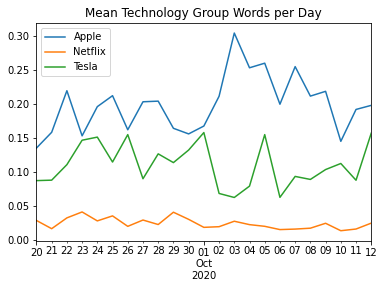

In [90]:
companies = ['Apple','Netflix','Tesla']
test = frequency1.groupby(['company',pd.Grouper(freq='D')]).mean()
test.unstack(level=0).plot()
plt.legend(companies)
plt.title('Mean Technology Group Words per Day')
plt.xlabel('')

#### Graph of Model 3

In [91]:
# Get list of words for annotation of the scatter plot
vocab1 = list(model1.wv.vocab)
X1 = model1[vocab1]

# Project them onto the 2 Dimensional space
tsne1 = TSNE(n_components=2,random_state=1234)
X_tsne1 = tsne1.fit_transform(X1)
# Create a DataFrame with words as index, and
# 2 dimensions as main columns (x-axis, y-axis)
scatter_df1 = pd.DataFrame(X_tsne1, index=vocab1, columns=['x', 'y'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


Text(23.929998, -14.692762, 'driveelectric')

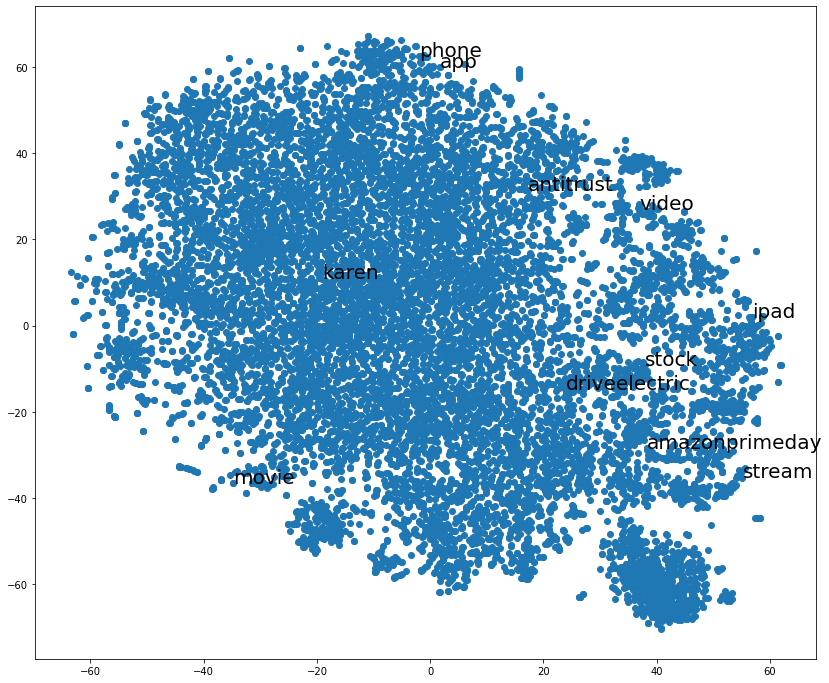

In [92]:
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(scatter_df1['x'], scatter_df1['y'])

ax.annotate('phone',(scatter_df1.loc['phone'][0],scatter_df1.loc['phone'][1]),fontsize=20)
ax.annotate('app',(scatter_df1.loc['app'][0],scatter_df1.loc['app'][1]),fontsize=20)
ax.annotate('movie',(scatter_df1.loc['movie'][0],scatter_df1.loc['movie'][1]),fontsize=20)
ax.annotate('stream',(scatter_df1.loc['stream'][0],scatter_df1.loc['stream'][1]),fontsize=20)
ax.annotate('video',(scatter_df1.loc['video'][0],scatter_df1.loc['video'][1]),fontsize=20)
ax.annotate('antitrust',(scatter_df1.loc['antitrust'][0],scatter_df1.loc['antitrust'][1]),fontsize=20)
ax.annotate('amazonprimeday',(scatter_df1.loc['amazonprimeday'][0],scatter_df1.loc['amazonprimeday'][1]),fontsize=20)
ax.annotate('karen',(scatter_df1.loc['karen'][0],scatter_df1.loc['karen'][1]),fontsize=20)
ax.annotate('stock',(scatter_df1.loc['stock'][0],scatter_df1.loc['stock'][1]),fontsize=20)
ax.annotate('ipad',(scatter_df1.loc['ipad'][0],scatter_df1.loc['ipad'][1]),fontsize=20)
ax.annotate('driveelectric',(scatter_df1.loc['driveelectric'][0],scatter_df1.loc['driveelectric'][1]),fontsize=20)


#### Model 3 Relationships/Analogies

In [93]:
print('Phone is to call like car is to ')
print(model1.wv.most_similar(positive=["phone", "car"], negative=["call"], topn=1))
print('Movie is to actor like iPad is to ')
print(model1.wv.most_similar(positive=["movie", "ipad"], negative=["actor"], topn=1))
print('Crew is to cast like engineer is to ')
print(model1.wv.most_similar(positive=["crew", "engineer"], negative=["cast"], topn=1))
print('Apple is to iPhone like Tesla is to ')
print(model1.wv.most_similar(positive=["apple", "tesla"], negative=["iphone"], topn=1))
print('Tesla is to electric like film is to ')
print(model1.wv.most_similar(positive=["tesla", "film"], negative=["electric"], topn=1))
print('Competitor is to game like teamwork is to ')
print(model1.wv.most_similar(positive=["competitor", "teamwork"], negative=["game"], topn=1))
print('Car is to fuel like phone is to ')
print(model1.wv.most_similar(positive=["car", "phone"], negative=["fuel"], topn=1))
print('Privacy is to cell internet like is to ')
print(model1.wv.most_similar(positive=["privacy", "internet"], negative=["cell"], topn=1))
print('App is to game like series is to ')
print(model1.wv.most_similar(positive=["app", "series"], negative=["game"], topn=1))
print('ModelX is to ModelY like iPad is to ')
print(model1.wv.most_similar(positive=["modelx", "ipad"], negative=["modely"], topn=1))

Phone is to call like car is to 
[('cars', 0.5166990756988525)]
Movie is to actor like iPad is to 
[('beta', 0.660256028175354)]
Crew is to cast like engineer is to 
[('predictive', 0.8829576373100281)]
Apple is to iPhone like Tesla is to 
[('spacex', 0.5266367197036743)]
Tesla is to electric like film is to 
[('movie', 0.6837665438652039)]
Competitor is to game like teamwork is to 
[('performing', 0.8262941837310791)]
Car is to fuel like phone is to 
[('camera', 0.5193378329277039)]
Privacy is to cell internet like is to 
[('algorithms', 0.7573179006576538)]
App is to game like series is to 
[('show', 0.556867241859436)]
ModelX is to ModelY like iPad is to 
[('tablet', 0.8002371788024902)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Question 13

### Model 4 (Size = 50, Window = 3, Minimum Count = 5)

In [94]:
model2 = Word2Vec(df['we_text1'].sum(), size=50, sg=1,window=3, min_count=5, seed=42)

In [95]:
technology2=model2.wv.most_similar("technology",topn=10)
technology2=pd.DataFrame(technology2)[0].to_list()
technology2=re.compile('|'.join(technology2))
technology2

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


re.compile(r'innovation|tech|engineering|technews|science|startup|marketing|advertising|business|ai',
re.UNICODE)

In [96]:
streaming2=model2.wv.most_similar("streaming",topn=10)
streaming2=pd.DataFrame(streaming2)[0].to_list()
streaming2=re.compile('|'.join(streaming2))
streaming2

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


re.compile(r'available|ott|vod|radio|entertainment|platforms|primevideo|iptv|hotstar|amazonprimevideo',
re.UNICODE)

In [97]:
battery2=model2.wv.most_similar('battery',topn=10)
battery2=pd.DataFrame(battery2)[0].to_list()
battery2=re.compile('|'.join(battery2))
battery2

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


re.compile(r'batteryday|tabless|cells|autopilot|cell|batteries|charging|drain|fsd|cybertruck',
re.UNICODE)

In [98]:
frequency2 = pd.DataFrame()
frequency2['company'] = df.company
frequency2.set_index(df.index)
frequency2['technology2'] = df['we_text'].astype(str).str.count(technology2)
print('The total number of technology group words is',frequency2['technology2'].sum())

The total number of technology group words is 18018


In [99]:
frequency2.head()

,company,technology2
new_date,,
2020-10-10 02:13:00,Apple,0
2020-09-25 13:34:00,Apple,0
2020-10-10 05:14:00,Apple,0
2020-10-11 17:23:00,Apple,0
2020-09-25 12:34:00,Apple,0


Text(0.5, 0, '')

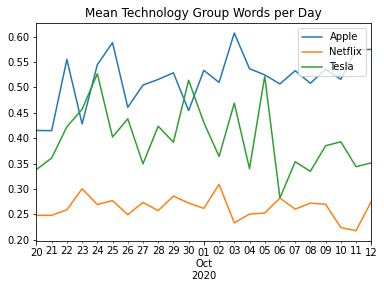

In [100]:
companies = ['Apple','Netflix','Tesla']
test = frequency2.groupby(['company',pd.Grouper(freq='D')]).mean()
test.unstack(level=0).plot()
plt.legend(companies)
plt.title('Mean Technology Group Words per Day')
plt.xlabel('')

#### Model 4 Graph

In [101]:
# Get list of words for annotation of the scatter plot
vocab2 = list(model2.wv.vocab)
X2 = model2[vocab2]

# Project them onto the 2 Dimensional space
tsne2 = TSNE(n_components=2,random_state=1234)
X_tsne2 = tsne2.fit_transform(X2)
# Create a DataFrame with words as index, and
# 2 dimensions as main columns (x-axis, y-axis)
scatter_df2 = pd.DataFrame(X_tsne2, index=vocab2, columns=['x', 'y'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


Text(23.929998, -14.692762, 'driveelectric')

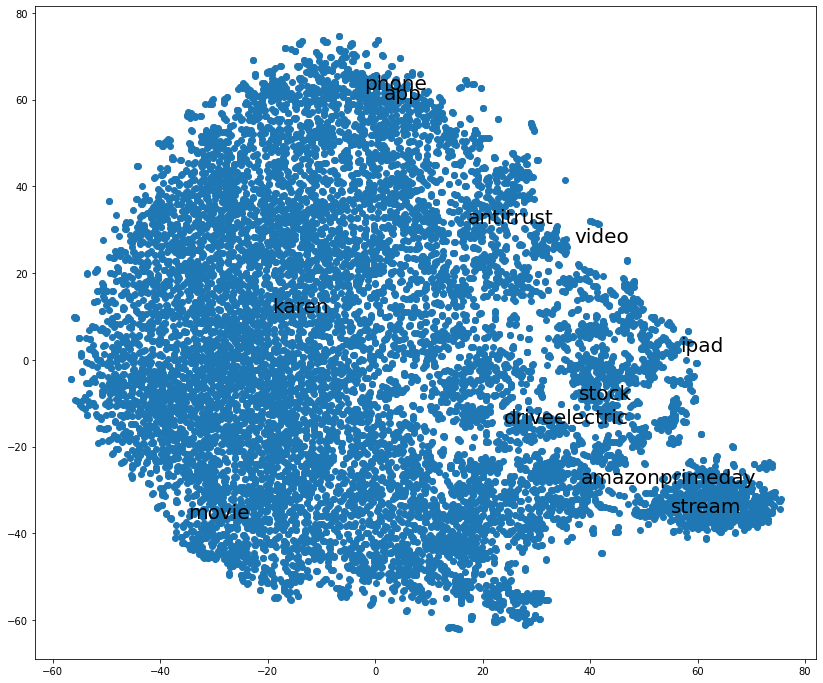

In [102]:
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(scatter_df2['x'], scatter_df2['y'])

# #Annotate each point with its word
# for word, pos in scatter_df.iterrows():
#     ax.annotate(word, pos)
# plt.show()

ax.annotate('phone',(scatter_df1.loc['phone'][0],scatter_df1.loc['phone'][1]),fontsize=20)
ax.annotate('app',(scatter_df1.loc['app'][0],scatter_df1.loc['app'][1]),fontsize=20)
ax.annotate('movie',(scatter_df1.loc['movie'][0],scatter_df1.loc['movie'][1]),fontsize=20)
ax.annotate('stream',(scatter_df1.loc['stream'][0],scatter_df1.loc['stream'][1]),fontsize=20)
ax.annotate('video',(scatter_df1.loc['video'][0],scatter_df1.loc['video'][1]),fontsize=20)
ax.annotate('antitrust',(scatter_df1.loc['antitrust'][0],scatter_df1.loc['antitrust'][1]),fontsize=20)
ax.annotate('amazonprimeday',(scatter_df1.loc['amazonprimeday'][0],scatter_df1.loc['amazonprimeday'][1]),fontsize=20)
ax.annotate('karen',(scatter_df1.loc['karen'][0],scatter_df1.loc['karen'][1]),fontsize=20)
ax.annotate('stock',(scatter_df1.loc['stock'][0],scatter_df1.loc['stock'][1]),fontsize=20)
ax.annotate('ipad',(scatter_df1.loc['ipad'][0],scatter_df1.loc['ipad'][1]),fontsize=20)
ax.annotate('driveelectric',(scatter_df1.loc['driveelectric'][0],scatter_df1.loc['driveelectric'][1]),fontsize=20)

#### Model 4 Analogies

In [103]:
print('Phone is to call like car is to ')
print(model2.wv.most_similar(positive=["phone", "car"], negative=["call"], topn=1))
print('Movie is to actor like iPad is to ')
print(model2.wv.most_similar(positive=["movie", "ipad"], negative=["actor"], topn=1))
print('Crew is to cast like engineer is to ')
print(model2.wv.most_similar(positive=["crew", "engineer"], negative=["cast"], topn=1))
print('Apple is to iPhone like Tesla is to ')
print(model2.wv.most_similar(positive=["apple", "tesla"], negative=["iphone"], topn=1))
print('Tesla is to electric like film is to ')
print(model2.wv.most_similar(positive=["tesla", "film"], negative=["electric"], topn=1))
print('Competitor is to game like teamwork is to ')
print(model2.wv.most_similar(positive=["competitor", "teamwork"], negative=["game"], topn=1))
print('Car is to fuel like phone is to ')
print(model2.wv.most_similar(positive=["car", "phone"], negative=["fuel"], topn=1))
print('Privacy is to cell internet like is to ')
print(model2.wv.most_similar(positive=["privacy", "internet"], negative=["cell"], topn=1))
print('App is to game like series is to ')
print(model2.wv.most_similar(positive=["app", "series"], negative=["game"], topn=1))
print('ModelX is to ModelY like iPad is to ')
print(model2.wv.most_similar(positive=["modelx", "ipad"], negative=["modely"], topn=1))


Phone is to call like car is to 
[('name', 0.5934856534004211)]
Movie is to actor like iPad is to 
[('ipod', 0.7467163801193237)]
Crew is to cast like engineer is to 
[('workers', 0.8992777466773987)]
Apple is to iPhone like Tesla is to 
[('tsla', 0.6634426116943359)]
Tesla is to electric like film is to 
[('movie', 0.7579415440559387)]
Competitor is to game like teamwork is to 
[('murdering', 0.8661541938781738)]
Car is to fuel like phone is to 
[('charger', 0.6180174946784973)]
Privacy is to cell internet like is to 
[('algorithms', 0.7763997912406921)]
App is to game like series is to 
[('show', 0.6459733843803406)]
ModelX is to ModelY like iPad is to 
[('tablet', 0.8455947041511536)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


When we reduced the model to a smaller dimension and window size at 3, we see that we observe some of the same results. However, there were some words, that did seem a little out of place. Altogether, we see that the reduced model did perform slightly worse. Because of how many documents we had, the reduced model may have performed better than expected had we used the minimum requirement of 300 documents instead.

When observing the analogies given in the reduced model, we see that it performs more poorly than the original model. In our full code with all 10 results, the reduced model sometimes returns the same analogy as the original model with 300 dimensions and window size set to 5. However, many of the times, it returned an analogy or word relationship that did not make much sense, like car is to fuel like phone is to camera. 
We believe that since the context and syntax is a little bit more complicated than just finding similar words, it is understandable that the models do not do as well, with a more clear deterioration if you reduce dimensionality.
